In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('./data/student-mat.csv')
data.head(10)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10
5,GP,M,16,U,LE3,T,4,3,services,other,...,5,4,2,1,2,5,10,15,15,15
6,GP,M,16,U,LE3,T,2,2,other,other,...,4,4,4,1,1,3,0,12,12,11
7,GP,F,17,U,GT3,A,4,4,other,teacher,...,4,1,4,1,1,1,6,6,5,6
8,GP,M,15,U,LE3,A,3,2,services,other,...,4,2,2,1,1,1,0,16,18,19
9,GP,M,15,U,GT3,T,3,4,other,other,...,5,5,1,1,1,5,0,14,15,15


In [3]:
data.shape

(395, 33)

In [4]:
data.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3'],
      dtype='object')

In [5]:
male = data[data['sex']=='M']
female = data[data['sex']=='F']

In [6]:
print("average male daily alcohol consumption: ", male['Dalc'].sum() / male.shape[0])
print("average female daily alcohol consumption: ", female['Dalc'].sum() / female.shape[0])

average male daily alcohol consumption:  1.732620320855615
average female daily alcohol consumption:  1.2548076923076923


In [7]:
print("average male week alcohol consumption: ", male['Walc'].sum() / male.shape[0])
print("average female week alcohol consumption: ", female['Walc'].sum() / female.shape[0])

average male week alcohol consumption:  2.663101604278075
average female week alcohol consumption:  1.9567307692307692


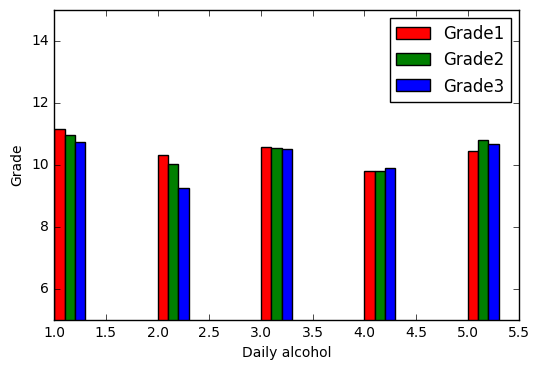

In [8]:
dg1 = data.groupby(data['Dalc'])['G1'].mean()
dg2 = data.groupby(data['Dalc'])['G2'].mean()
dg3 = data.groupby(data['Dalc'])['G3'].mean()
plt.figure()
plt.bar([1,2,3,4,5], dg1, color='r', width=0.1, label='Grade1')
plt.bar([1.1,2.1,3.1,4.1,5.1], dg2, width=0.1, color='g', label='Grade2')
plt.bar([1.2,2.2,3.2,4.2,5.2], dg3, width=0.1, color='b', label='Grade3')
plt.xlabel("Daily alcohol")
plt.ylabel("Grade")
plt.legend()
plt.ylim((5,15))
plt.show()

In [9]:
dg1 = data.groupby(data['G1'])['Dalc'].mean()
dg2 = data.groupby(data['G2'])['Dalc'].mean()
dg3 = data.groupby(data['G3'])['Dalc'].mean()
for i in range(21):
    if i not in dg1.index:
        dg1[i]=0
dg1=dg1.sort_index()

for i in range(21):
    if i not in dg2.index:
        dg2[i]=0
dg2=dg2.sort_index()

for i in range(21):
    if i not in dg3.index:
        dg3[i]=0
dg3=dg3.sort_index()

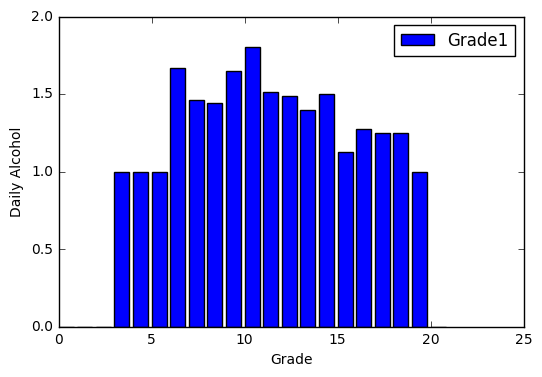

In [28]:

plt.figure()
plt.bar(list(range(0,21)), dg1, label='Grade1')
plt.xlabel("Grade")
plt.ylabel("Daily Alcohol")
plt.legend()
plt.show()

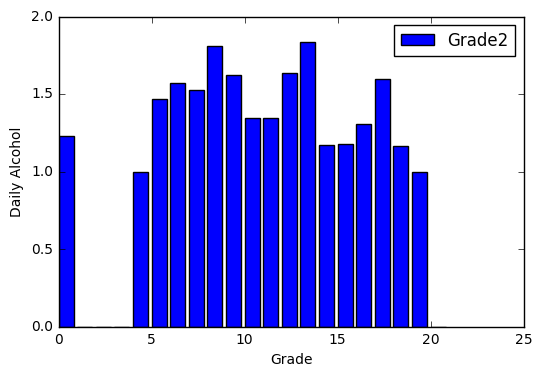

In [29]:

plt.figure()
plt.bar(list(range(0,21)), dg2, label='Grade2')
plt.xlabel("Grade")
plt.ylabel("Daily Alcohol")
plt.legend()
plt.show()

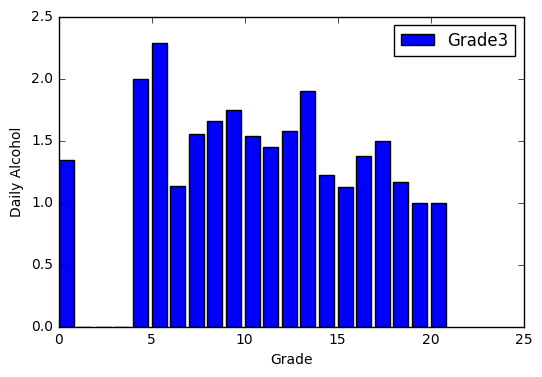

In [30]:

plt.figure()
plt.bar(list(range(0,21)), dg3, label='Grade3')
plt.xlabel("Grade")
plt.ylabel("Daily Alcohol")
plt.legend()
plt.show()

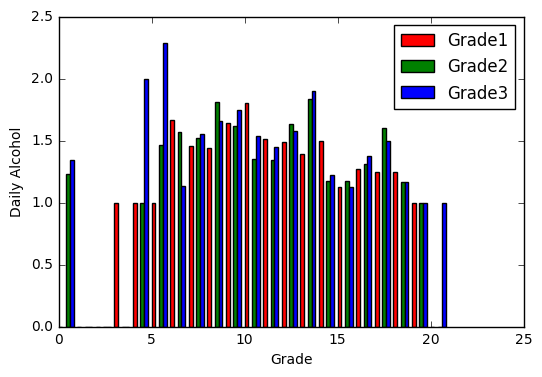

In [26]:

plt.figure()
plt.bar(list(x for x in range(0,21)), dg1, color='r', width=0.2, label='Grade1')
plt.bar(list((x+0.4) for x in range(0,21)), dg2, width=0.2, color='g', label='Grade2')
plt.bar(list((x+0.6) for x in range(0,21)), dg3, width=0.2, color='b', label='Grade3')
plt.xlabel("Grade")
plt.ylabel("Daily Alcohol")
plt.legend()
plt.show()

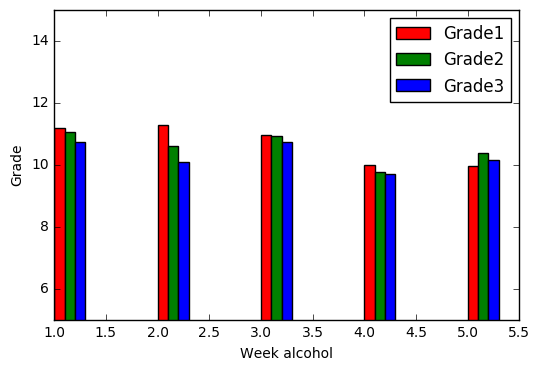

In [11]:
wg1 = data.groupby(data['Walc'])['G1'].mean()
wg2 = data.groupby(data['Walc'])['G2'].mean()
wg3 = data.groupby(data['Walc'])['G3'].mean()
plt.figure()
plt.bar([1,2,3,4,5], wg1, color='r', width=0.1, label='Grade1')
plt.bar([1.1,2.1,3.1,4.1,5.1], wg2, width=0.1, color='g', label='Grade2')
plt.bar([1.2,2.2,3.2,4.2,5.2], wg3, width=0.1, color='b', label='Grade3')
plt.xlabel("Week alcohol")
plt.ylabel("Grade")
plt.legend()
plt.ylim((5,15))
plt.show()

# Grade Difference between sex

In [12]:
sex1 = data.groupby(data['sex'])['G1'].mean()
sex2 = data.groupby(data['sex'])['G2'].mean()
sex3 = data.groupby(data['sex'])['G3'].mean()
print(sex1)
print(sex2)
print(sex3)

sex
F    10.620192
M    11.229947
Name: G1, dtype: float64
sex
F    10.389423
M    11.074866
Name: G2, dtype: float64
sex
F     9.966346
M    10.914439
Name: G3, dtype: float64


In [13]:
ages = list(set(data['age']))
ages

[15, 16, 17, 18, 19, 20, 21, 22]

age
15    11.231707
16    10.942308
17    10.897959
18    10.719512
19    10.250000
20    13.666667
21    10.000000
22     6.000000
Name: G1, dtype: float64
age
15    11.365854
16    11.182692
17    10.479592
18    10.134146
19     9.250000
20    13.666667
21     8.000000
22     8.000000
Name: G2, dtype: float64
age
15    11.256098
16    11.028846
17    10.275510
18     9.548780
19     8.208333
20    14.000000
21     7.000000
22     8.000000
Name: G3, dtype: float64


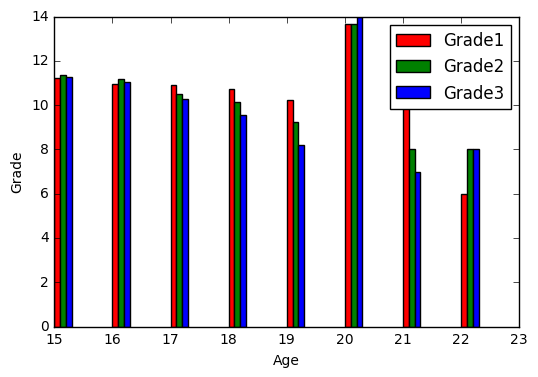

In [14]:
age1 = data.groupby(data['age'])['G1'].mean()
age2 = data.groupby(data['age'])['G2'].mean()
age3 = data.groupby(data['age'])['G3'].mean()

print(age1)
print(age2)
print(age3)
plt.figure()
plt.bar(list(map(lambda x: x,range(15, 23))), age1, color='r', width=0.1, label='Grade1')
plt.bar(list(map(lambda x: x+0.1,range(15, 23))), age2, color='g', width=0.1, label='Grade2')
plt.bar(list(map(lambda x: x+0.2,range(15, 23))), age3, color='b', width=0.1, label='Grade3')
plt.xlabel("Age")
plt.ylabel("Grade")
plt.legend()
plt.show()

In [15]:
data['Pedu'] = data['Medu'] + data['Fedu']
pedug1 = data.groupby(data['Pedu'])['G1'].mean()
pedug2 = data.groupby(data['Pedu'])['G2'].mean()
pedug3 = data.groupby(data['Pedu'])['G3'].mean()
print(pedug1)
print(pedug2)
print(pedug3)

Pedu
1    10.000000
2     9.538462
3    10.232558
4    10.416667
5    10.808511
6    11.125000
7    11.637931
8    11.885714
Name: G1, dtype: float64
Pedu
1    11.500000
2     9.051282
3     9.581395
4    10.472222
5    10.638298
6    11.187500
7    11.155172
8    11.814286
Name: G2, dtype: float64
Pedu
1    12.500000
2     8.641026
3     9.255814
4     9.597222
5    10.404255
6    11.296875
7    10.948276
8    11.657143
Name: G3, dtype: float64


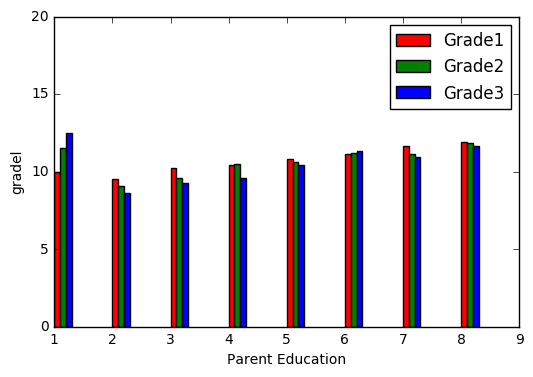

In [16]:
plt.figure()
plt.bar(list(map(lambda x: x,range(1, 9))), pedug1, color='r', width=0.1, label='Grade1')
plt.bar(list(map(lambda x: x+0.1,range(1, 9))), pedug2, color='g', width=0.1, label='Grade2')
plt.bar(list(map(lambda x: x+0.2,range(1, 9))), pedug3, color='b', width=0.1, label='Grade3')
plt.xlabel("Parent Education")
plt.ylabel("gradel")
plt.legend()
plt.ylim((0,20))
plt.show()

In [17]:
peduDalc = data.groupby(data['Pedu'])['Walc'].mean()
peduWalc = data.groupby(data['Pedu'])['Dalc'].mean()
print(peduDalc)
print(peduWalc)

Pedu
1    1.000000
2    2.487179
3    2.348837
4    2.347222
5    2.191489
6    2.250000
7    2.224138
8    2.285714
Name: Walc, dtype: float64
Pedu
1    1.000000
2    1.538462
3    1.441860
4    1.583333
5    1.297872
6    1.468750
7    1.327586
8    1.642857
Name: Dalc, dtype: float64


In [18]:
g1absence = data.groupby(data['G1'])['absences'].mean()
g2absence = data.groupby(data['G2'])['absences'].mean()
g3absence = data.groupby(data['G3'])['absences'].mean()

In [19]:
g1absence.index

Int64Index([3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19], dtype='int64', name='G1')

In [20]:
for i in range(21):
    if i not in g1absence.index:
        g1absence[i]=0
g1absence=g1absence.sort_index()

for i in range(21):
    if i not in g2absence.index:
        g2absence[i]=0
g2absence=g2absence.sort_index()

for i in range(21):
    if i not in g3absence.index:
        g3absence[i]=0
g3absence=g3absence.sort_index()

In [21]:
g1absence 

G1
0     0.000000
1     0.000000
2     0.000000
3     8.000000
4     0.000000
5     4.000000
6     6.291667
7     4.702703
8     5.073171
9     8.354839
10    6.666667
11    6.358974
12    6.028571
13    5.272727
14    4.566667
15    4.500000
16    4.454545
17    5.000000
18    8.125000
19    2.000000
20    0.000000
Name: absences, dtype: float64

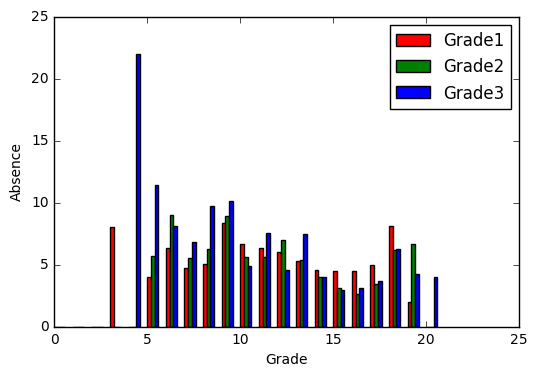

In [22]:
plt.figure()
plt.bar(list(map(lambda x: x,range(0, 21))), g1absence, color='r', width=0.2, label='Grade1')
plt.bar(list(map(lambda x: x+0.2,range(0, 21))), g2absence, color='g', width=0.2, label='Grade2')
plt.bar(list(map(lambda x: x+0.4,range(0, 21))), g3absence.values, color='b', width=0.2, label='Grade3')
plt.xlabel("Grade")
plt.ylabel("Absence")
plt.legend()
plt.show()